![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part III

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

> answers by:
> - matthew koton

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 28/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0003Part003.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine, make_s_curve

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)

TOTAL_RUN_TIME = 20 #<! Don't touch it!


In [4]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):

    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)

    # Validate the column name
    if colName not in dfX.columns:
        raise ValueError(f"Column name {colName} not found in DataFrame.")

    # Validate the number of samples
    unique_counts = dfX[colName].value_counts()
    if any(unique_counts < numSamples):
        raise ValueError(f"Number of samples {numSamples} is too high for some categories.")

    return dfX.groupby(colName, as_index=False, group_keys=False).apply(lambda dfS: dfS.sample(numSamples, replace=False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [5]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 20 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

In [6]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook

from scipy.sparse.linalg import eigsh
from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import KernelCenterer

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

## Generate / Load Data

In [7]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 5. Kernel PCA (K-PCA / KPCA)

### 5.1. Kernel PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Kernel PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
   The input will include the encoder dimension `d` and a callable function for the kernel.
2. `fit()` - Given a data set builds the encoder.  
3. `transform()` - Applies the encoding on the input data.   

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's Kernel PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).
* <font color='brown'>(**#**)</font> You may assume the kernel function `k` ($ k : \, \mathbb{R}^{D} \times \mathbb{R}^{D} \to \mathbb{R} $) has the following signature:

```python
def k(mX1: np.ndarray, mX2: np.ndarray)
    '''
    Computes the kernel function between two sets of vectors.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
    Output:
        mKx - Output kernel matrix with shape N1 x N2.
    '''
```


In [8]:
class KPCA:
    def __init__(self, d: int = 2, k: Callable = lambda x: x):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
            k - A kernel function (Callable).
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.k = k
        self.mAlpha = None
        self.vLambda = None
        self.mX_fit = None

        #===============================================================#

    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.
        # Do not use `J` explicitly as a matrix multiplication.

        N = mX.shape[0]

        # Calculate the Kernel matrix
        mK = self.k(mX, mX)

        # Center the Kernel matrix
        one_n = np.ones((N, N)) / N
        mK = mK - one_n.dot(mK) - mK.dot(one_n) + one_n.dot(mK).dot(one_n)

        # Eigen decomposition
        self.vLambda, self.mAlpha = eigsh(mK, k=self.d)

        # Sort d eigenvalues and eigenvectors in descending order
        idx = self.vLambda.argsort()[::-1]
        self.vLambda = self.vLambda[idx]
        self.mAlpha = self.mAlpha[:, idx]

        # Store the fitted data
        self.mX_fit = mX

        #===============================================================#
        return self

    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.

        N = mX.shape[0]
        N_fit = self.mX_fit.shape[0]

        # Calculate kernel between mX and the fitted data
        mK = self.k(mX, self.mX_fit)

        # Center the kernel matrix
        one_n = np.ones((N, N_fit)) / N_fit
        mK = mK - one_n.dot(mK)  # Only centering with respect to the training data is needed

        # Calculate low dimensional representation
        mZ = mK.dot(self.mAlpha / np.sqrt(self.vLambda))

        #===============================================================#

        return mZ



* <font color='red'>(**?**)</font> Why `inverse_transform()` is not implemented? You may read about SciKit Learn's `inverse_transform()`.

In general, Kernel PCA (KPCA) does not easily allow for a straightforward "inverse transform" operation. This is because the dimensionality reduction in KPCA is performed in the feature space induced by the kernel, rather than in the original input space.

In standard linear PCA, the `inverse_transform` essentially projects points back to the original space by using the eigenvectors (principal components). But in KPCA, the transformation is nonlinear and involves an infinite-dimensional feature space defined by a kernel function. Due to this, there's no simple way to project points back to the original space unless you know the mapping function explicitly, which is usually not the case.

However, there are methods to approximate the pre-image of the feature space, but they can be computationally intensive and are not guaranteed to be accurate. SciKit-Learn's `KernelPCA` has an option for `fit_inverse_transform=True` to approximate the pre-image, but keeping in mind that it's an approximation.

Due to these reasons, the `inverse_transform` method is not usually implemented straightforwardly in KPCA.

### 5.2. K-PCA Application

In this section the K-PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($N$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the K-PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.  
   You should use the following kernels (Implemented by yourself):
> * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j}$.
> * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \left(1 + \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j} \right)^{p}$.  
You should set a reasonable $p$.
> * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \exp \left( - \frac{\left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\|_{2}^{2}}{2 {\sigma}^{2}} \right)$.  
You should set a reasonable $\sigma$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set and kernel. You may show them in a single plot using sub plots.

In [9]:
#===========================Fill This===========================#
# 1. Implement the normalization function.
# !! Make sure to address the remark.

def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''

    mean = np.mean(mX, axis=0)
    std = np.std(mX, axis=0)
    std[std == 0] = 1.0  # To avoid division by zero
    mY = (mX - mean) / std

    return mY
#===============================================================#

In [10]:
#===========================Fill This===========================#
# 1. Implement the 3 kernels.
# !! Make sure to address the remarks.
# !! Pay attention that `np.dot(mA.T, mA)` is faster (Symmetric aware) than `mA.T @ mA`.

def KernelInnerProduct( mX1: np.ndarray, mX2: np.ndarray ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Inner Product kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    mKx = np.dot(mX1, mX2.T)

    return mKx

def KernelPolynomial( mX1: np.ndarray, mX2: np.ndarray, p: int = 2 ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Polynomial kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
        p   - The degree of the model.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    mKx = (1 + np.dot(mX1, mX2.T)) ** p

    return mKx

def KernelGaussian( mX1: np.ndarray, mX2: np.ndarray, σ2: float = None ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Gaussian kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
        σ2  - The variance of the model.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    N1, D = mX1.shape
    N2 = mX2.shape[0]
    m1 = np.sum(mX1 ** 2, axis=1).reshape(-1, 1)
    m2 = np.sum(mX2 ** 2, axis=1).reshape(1, -1)
    mD = m1 + m2 - 2 * np.dot(mX1, mX2.T)
    mKx = np.exp(-mD / (2 * σ2))

    return mKx

#===============================================================#

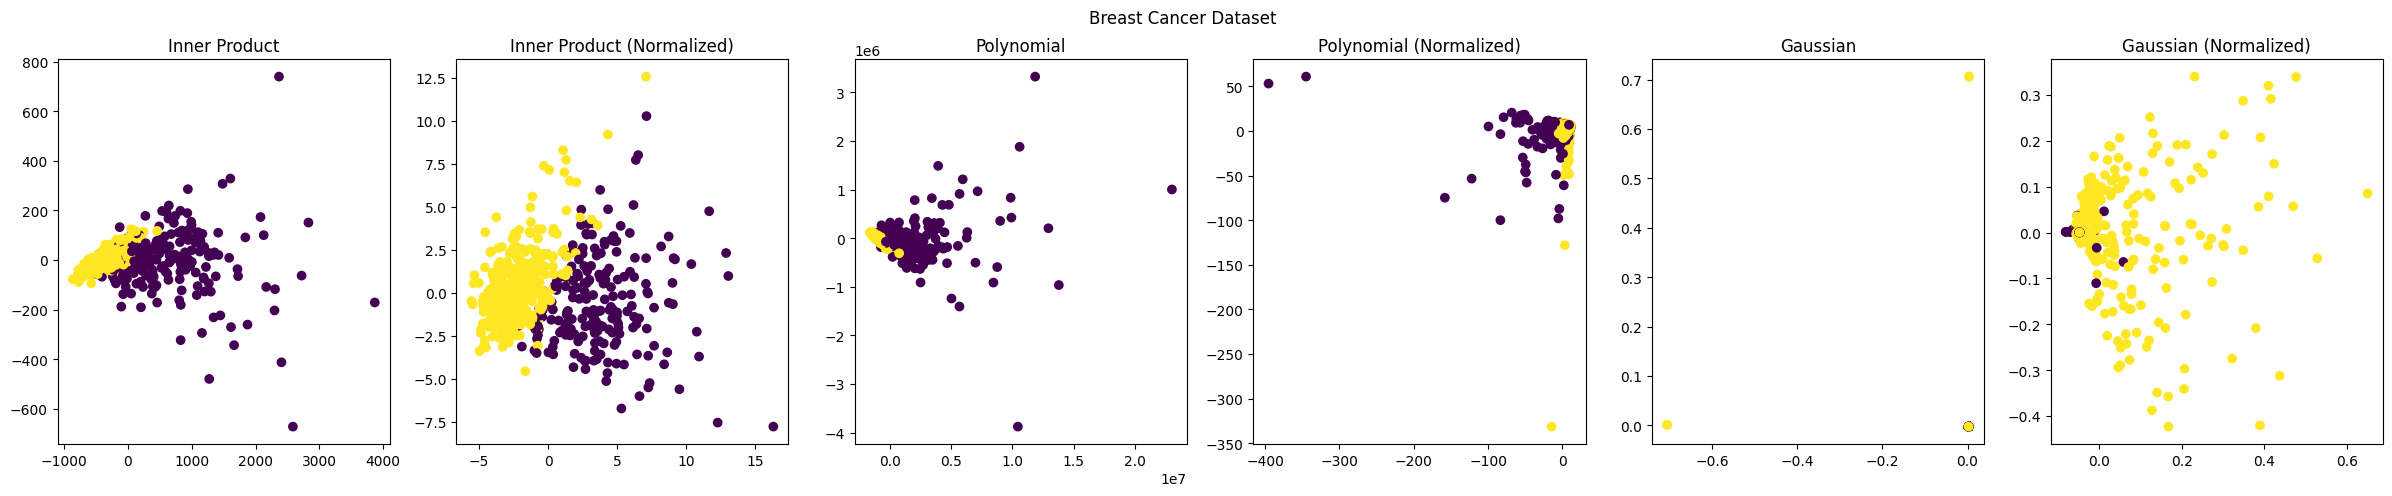

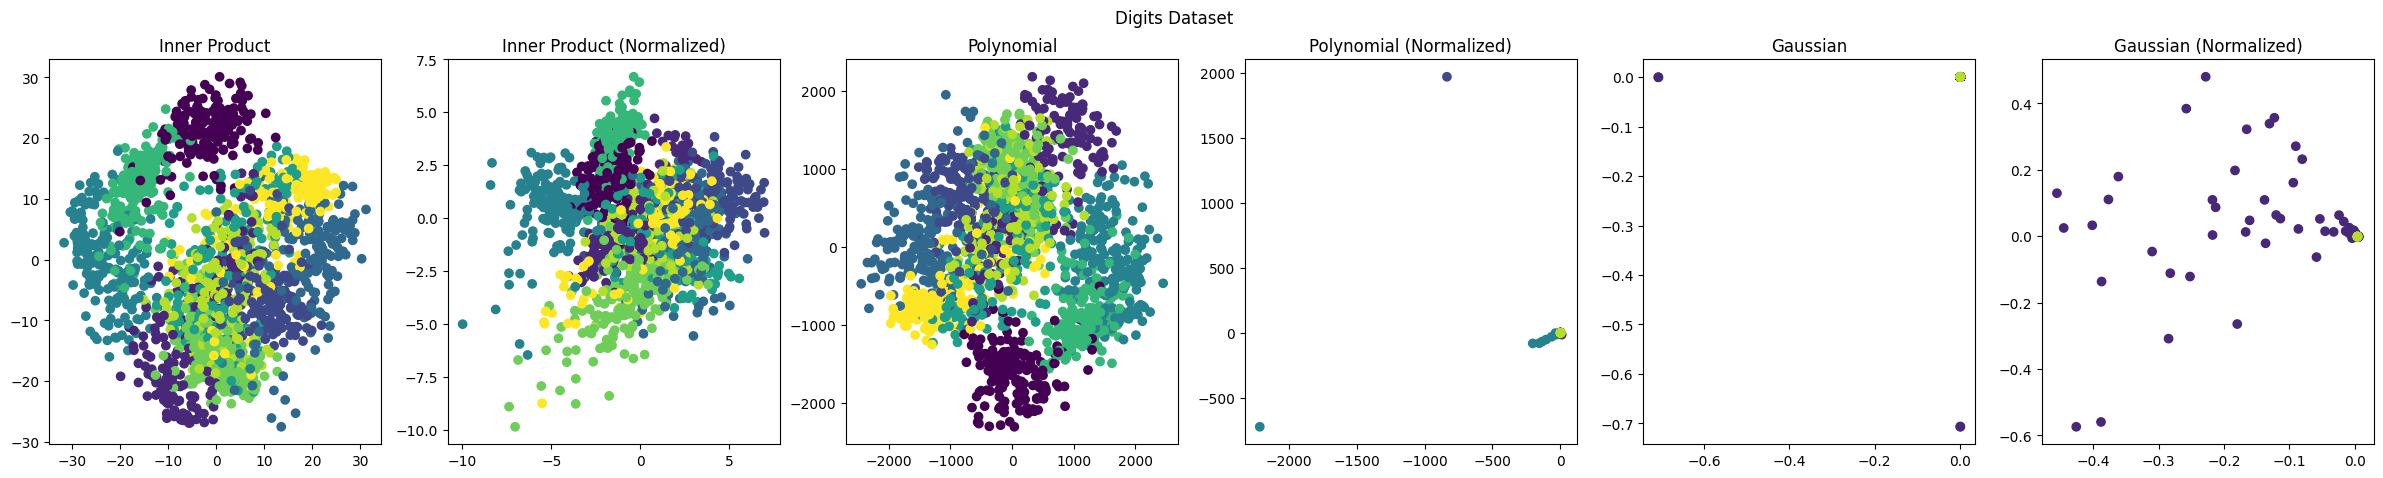

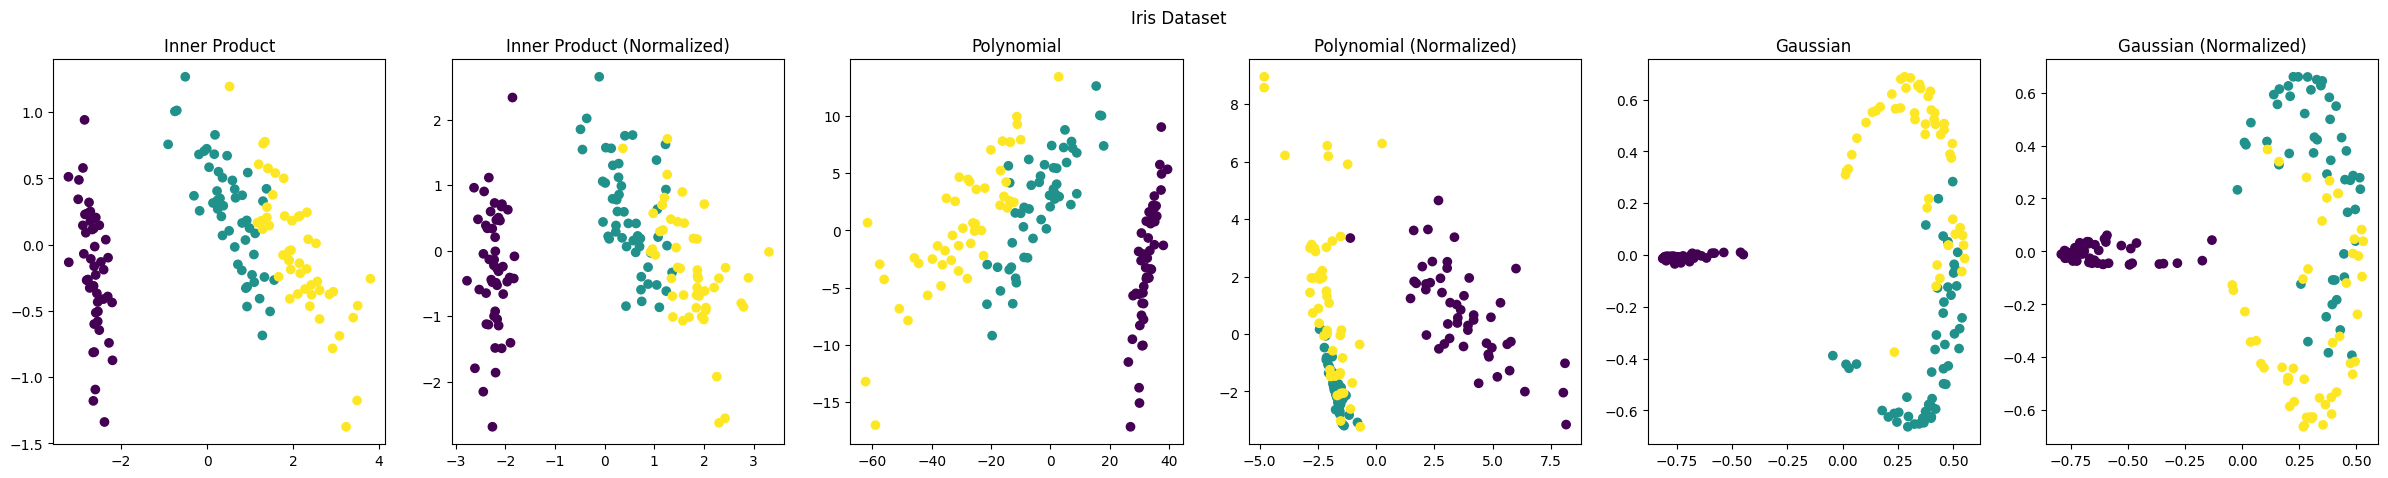

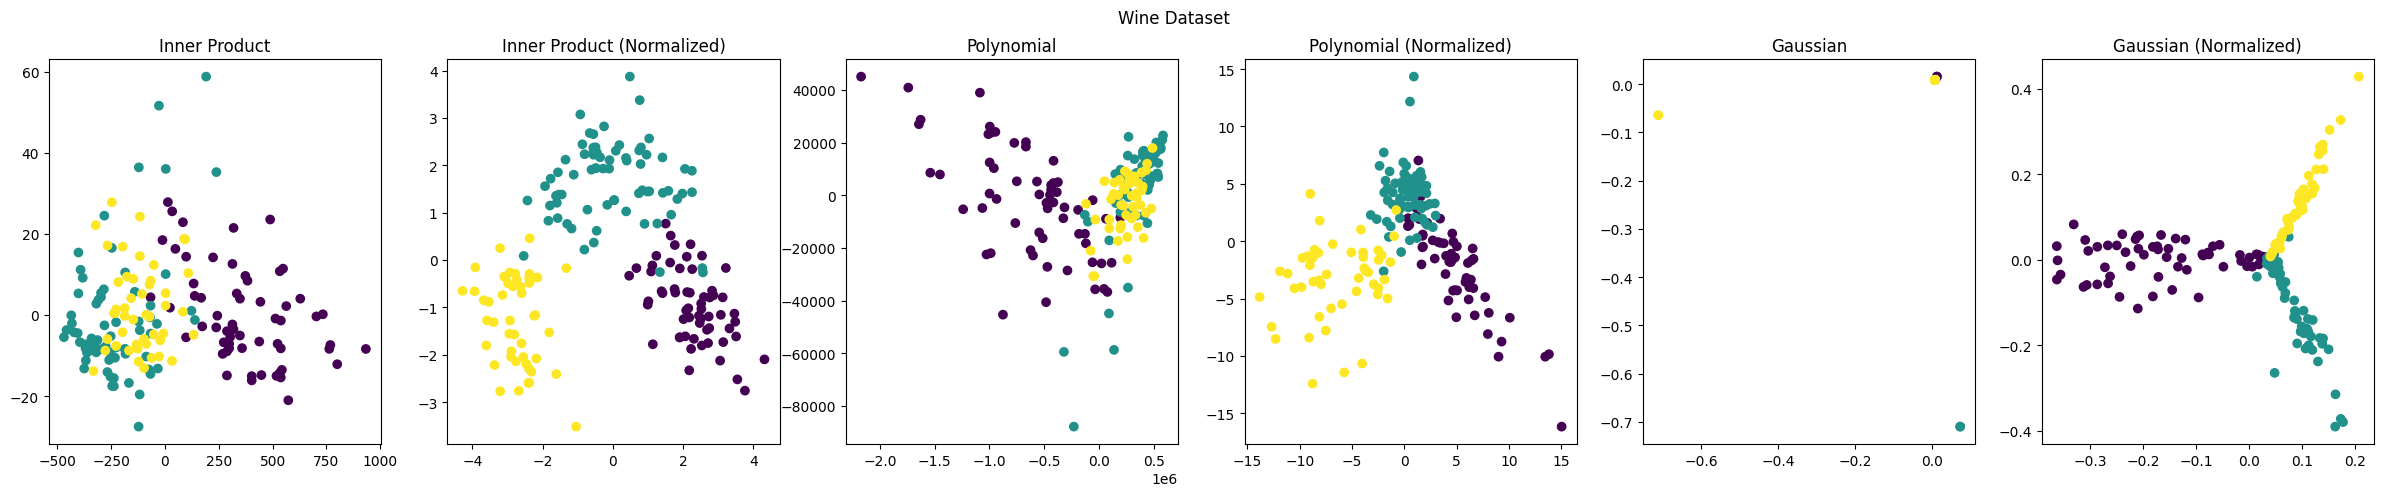

In [11]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.

# Define d for visualization
d = 2

# Define the kernel functions in a dictionary for easier iteration
kernels = {'Inner Product': KernelInnerProduct,
           'Polynomial': lambda x, y: KernelPolynomial(x, y, p=2),
           'Gaussian': lambda x, y: KernelGaussian(x, y, σ2=1.0)}

# Load each data set and apply K-PCA
datasets = {'Breast Cancer': load_breast_cancer(),
            'Digits': load_digits(),
            'Iris': load_iris(),
            'Wine': load_wine()}

for dataset_name, data in datasets.items():
    mX = data['data']
    vY = data['target']
    mX_normalized = NormalizeData(mX)

    fig, axs = plt.subplots(1, len(kernels) * 2, figsize=(30, 5))
    fig.suptitle(f'{dataset_name} Dataset')

    for i, (kernel_name, kernel_func) in enumerate(kernels.items()):
        # Apply K-PCA without normalization
        kpca = KPCA(d=d, k=kernel_func)
        mZ = kpca.fit(mX).transform(mX)
        axs[i * 2].scatter(mZ[:, 0], mZ[:, 1], c=vY)
        axs[i * 2].set_title(f'{kernel_name}')

        # Apply K-PCA with normalization
        mZ_normalized = kpca.fit(mX_normalized).transform(mX_normalized)
        axs[i * 2 + 1].scatter(mZ_normalized[:, 0], mZ_normalized[:, 1], c=vY)
        axs[i * 2 + 1].set_title(f'{kernel_name} (Normalized)')

    plt.show()


#===============================================================#

### 5.3. Question

In the above, compare the results of the _Inner Product_ kernel to the PCA from the previous part.  
Explain the results.

### <font color='red'>5.3. Solution</font>

**Comparison of Inner Product Kernel with PCA**

The Inner Product kernel in Kernel PCA essentially computes the same operation as linear PCA, i.e., it considers the covariance structure of the original features in the dataset. Both methods aim to find the principal components in the feature space, and both can be thought of as a linear operation in that feature space. Hence, when using the Inner Product kernel in K-PCA, the results will be quite similar to those of the standard linear PCA.

**Observations:**

1. **Scatter Plots**: The scatter plots of the transformed data points using both PCA and Inner Product kernel in K-PCA look very similar, both in the distribution of the data points.

2. **Normalization**: Just like in PCA, the normalization of features affects the output in the Inner Product kernel. The principal components might vary based on the scale of the original features.

3. **Dimensionality Reduction**: Both methods will produce similar reduced dimensions, capturing the same proportion of the variance of the original data.

4. **Computational Complexity**: Linear PCA generally has lower computational complexity compared to K-PCA with the Inner Product kernel, especially when $N < D$, where $N$ is the number of samples and $D$ is the number of features.

In summary, the Inner Product kernel in K-PCA is conceptually and mathematically aligned with what linear PCA does. Therefore, the results from these two methods should be very similar if not identical.


---

### 5.4. Kernel PCA with Geodesic Distance (Bonus 4 Points)

In this question we'll build a pseudo _geodesic distance_ and apply the Kernel PCA.

In this section:

 1. Generate 750 samples of S Curve manifold (2D in 3D) using SciKit Learn's [`make_s_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html).  
    Make sure to read about its output, specifically `t`.    
    This is already implemented.
 2. Build a pair wise distance function utilizing both the data coordinates and the `vT` variable.  
    Since the `vT` variable holds location data, this is a geodesic like distance.
 3. Show the distance for 3 different points.  
    This is already implemented.
 4. Apply a Kernel PCA from 3D to 2D on the data utilizing the distance function.
 5. Show the results in the 2D space.
 6. Explain the results (In words).  
    Do we actually need to create the distance / kernel matrix in this case?

* <font color='brown'>(**#**)</font> Since in the case above we use a pre computed distance function, you may not use the K-PCA but the PCA.  
  You may use SciKit's Learn PCA or your own implementation.
* With some tweaking of parameters and the distance function one may get the following result:

![](https://i.imgur.com/CYVzYnF.png)

In [12]:
# Generate the Data

N      = 750
mX, vT = make_s_curve(N)

numDispPts = 4

print(f'The data has shape of {mX.shape}')

The data has shape of (750, 3)


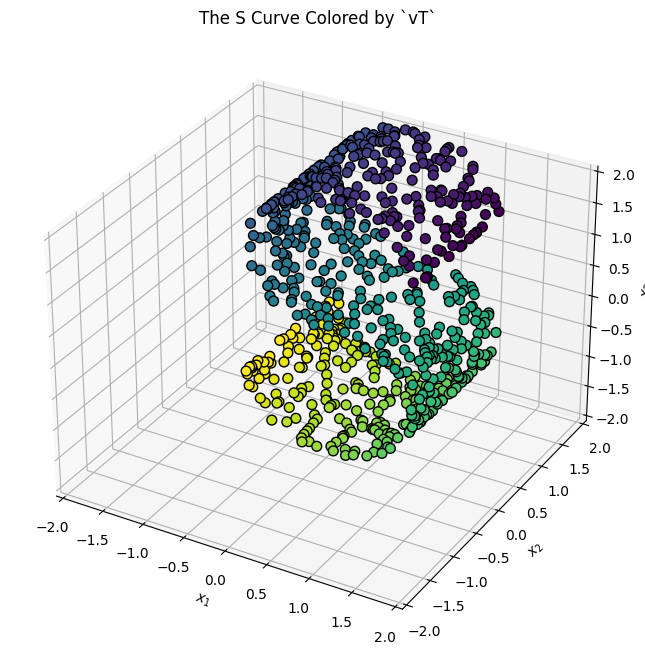

In [13]:
# Display the Data

hF = plt.figure(figsize = (8, 8))
hA = hF.add_subplot(projection = '3d')
hA.scatter(mX[:, 0], mX[:, 1], mX[:, 2], s = 50, c = vT, edgecolor = 'k', alpha = 1)
hA.set_xlim([-2, 2])
hA.set_ylim([-2, 2])
hA.set_zlim([-2, 2])
hA.set_xlabel('$x_1$')
hA.set_ylabel('$x_2$')
hA.set_zlabel('$x_3$')
hA.set_title('The S Curve Colored by `vT`')
plt.show()

In [14]:
#===========================Fill This===========================#
# 1. Generate a pair wise distance function.
# !! You may and should utilize the parameter `vT`.
# !! Since we use the location data `vT` this is a geodesic like distance.
# !! You may add any parameters you need to the function.

def DistanceFunction( mX: np.ndarray, vT: np.ndarray ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Polynomial kernel.
    Args:
        mX - Input data with shape N x D.
        vT - Input data (Location)
    Output:
        mD - Pair wise distance matrix with shape N x N.
    Remarks:
        - You may use SciPy's `cdist()` and / or `pdist()`.
    '''

    # Normalize using MinMax scaling
    scaler = MinMaxScaler()
    mX_normalized = scaler.fit_transform(mX)
    vT_normalized = scaler.fit_transform(vT.reshape(-1, 1))

    # Combine the normalized location and normalized univariate position for distance calculation
    combined_features_normalized = np.column_stack([mX_normalized, vT_normalized])

    # Compute pairwise Euclidean distances for the normalized combined features
    pairwise_distances_normalized = distance_matrix(combined_features_normalized, combined_features_normalized)

    # Set distance to infinity for points not directly connected
    threshold_normalized = np.percentile(pairwise_distances_normalized, 10)
    graph_normalized = np.where(pairwise_distances_normalized < threshold_normalized, pairwise_distances_normalized, float('inf'))

    # Convert to CSR format for scipy's dijkstra function
    graph_csr = csr_matrix(graph_normalized)

    # Compute geodesic distances using scipy's Dijkstra's algorithm
    n = len(mX_normalized)
    geodesic_distances_normalized = np.zeros((n, n))
    for i in range(n):
        geodesic_distances_normalized[i], _ = dijkstra(csgraph=graph_csr, directed=False, indices=i, return_predecessors=True)

    mD = geodesic_distances_normalized
#===============================================================#

    return mD

In [15]:
#===========================Fill This===========================#
# 1. Calculate the Distance Matrix `mD`.
# !! You may add any parameters you need to the function.

mD = DistanceFunction(mX, vT)

#===============================================================#

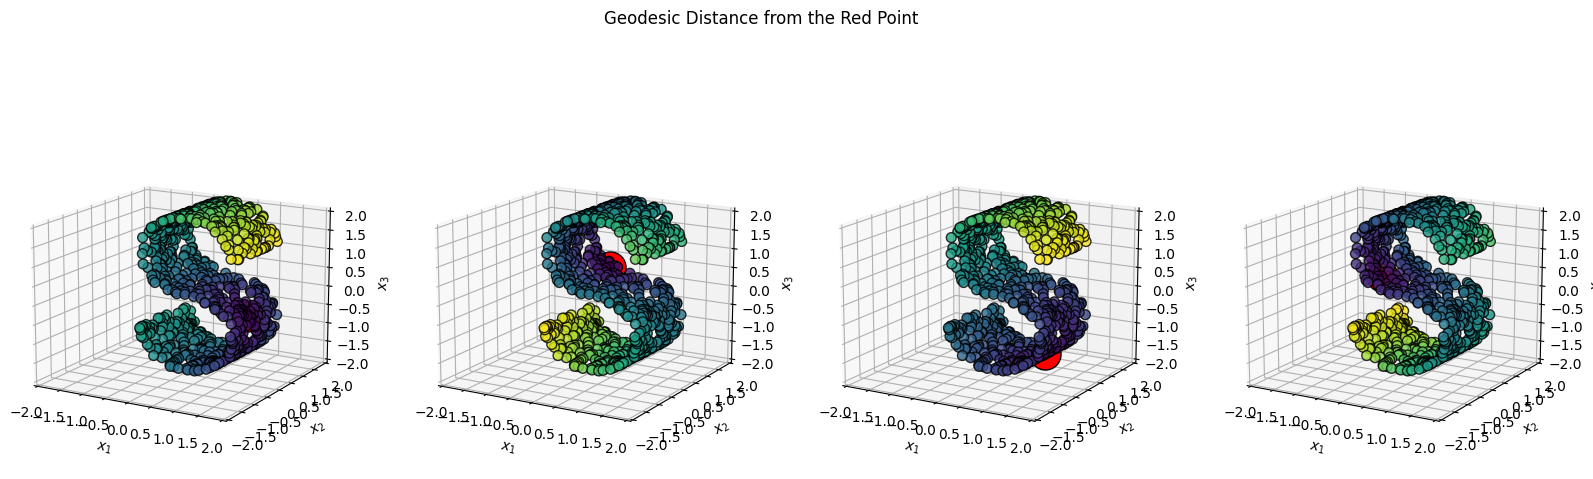

In [16]:
# Display the Distance Function for few Points
# The result should look like a local distance along the surface of the S curve.

vIdx = np.random.choice(N, numDispPts, replace = False)

hF = plt.figure(figsize = (20, 6))

for ii, idx in enumerate(vIdx):

    hA  = hF.add_subplot(1, numDispPts, ii + 1, projection = '3d')
    hA.scatter(*mX.T, s = 50, c = mD[idx, :], edgecolor = 'k', alpha = 0.8)
    hA.scatter(*mX[idx], s = 500, c = 'r', edgecolor = 'k', alpha = 1)
    hA.set_xlim([-2, 2])
    hA.set_ylim([-2, 2])
    hA.set_zlim([-2, 2])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    hA.set_zlabel('$x_3$')

    hA.view_init(elev = 15, azim = 300)

hF.suptitle('Geodesic Distance from the Red Point')

plt.show()

In [17]:
#===========================Fill This===========================#
# 1. Create a Kernel Matrix from the distance matrix.
# 2. Apply the K-PCA (Manually or using SciKit Learn).

K_normalized = -0.5 * (mD ** 2 - np.mean(mD, axis=0)[None, :] - np.mean(mD, axis=1)[:, None] + np.mean(mD))
K_normalized = KernelCenterer().fit_transform(K_normalized)

eigvals_normalized, eigvecs_normalized = np.linalg.eigh(K_normalized)
sorted_indices_normalized = np.argsort(eigvals_normalized)[::-1]
top_indices_normalized = sorted_indices_normalized[:2]

X_kpca_normalized = np.column_stack([eigvecs_normalized[:, i] * np.sqrt(eigvals_normalized[i]) for i in top_indices_normalized])

#===============================================================#

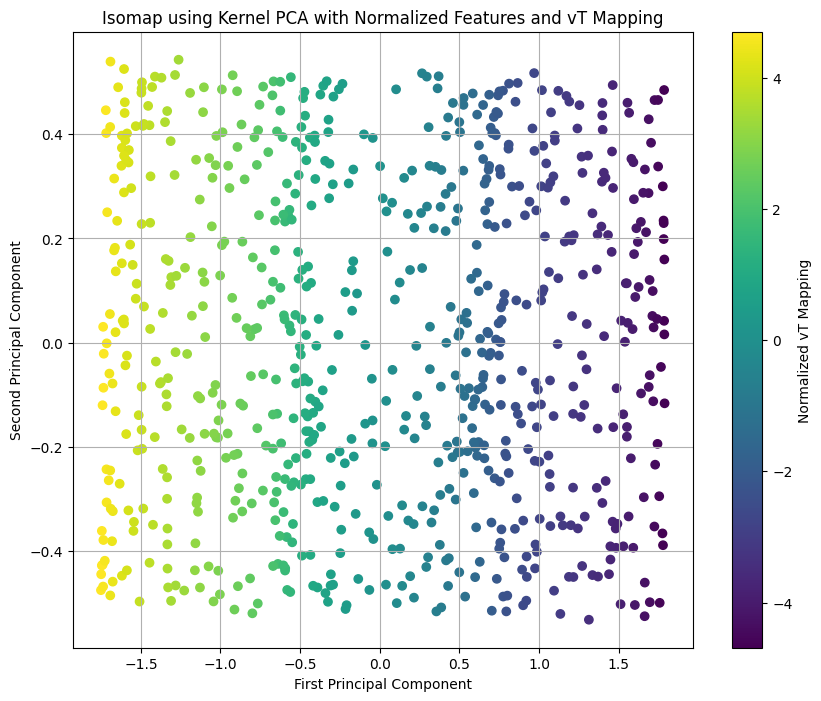

In [18]:
#===========================Fill This===========================#
# 1. Display the low dimension encoding of the data.
vT_normalized = vT.reshape(-1, 1)
plt.figure(figsize=(10, 8))
plt.scatter(X_kpca_normalized[:, 0], X_kpca_normalized[:, 1], c=vT_normalized.squeeze(), cmap='viridis', marker='o')
plt.title('Isomap using Kernel PCA with Normalized Features and vT Mapping')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Normalized vT Mapping')
plt.grid(True)
plt.show()
#===============================================================#

### <font color='red'>5.4.6. Solution</font>

**Explain the results:**

1. **Normalization**: It first normalizes the feature vectors ($mX$) and the location ($vT$) using MinMax scaling. This ensures that all features have the same range, making them equally important in distance calculations.

2. **Combining Features**: The normalized features and locations are then combined into a single feature vector for each data point.

3. **Euclidean Distance Matrix**: A pairwise Euclidean distance matrix is computed based on these combined feature vectors. This matrix captures the "straight-line" distance between every pair of points in the feature space.

4. **Thresholding**: A percentile-based threshold is applied to this distance matrix to produce a graph-like structure where some distances are set to infinity, indicating that those points are not directly connected.

5. **Geodesic Distance Matrix**: Dijkstra's algorithm is used to compute the geodesic distances between all pairs of points. Geodesic distances represent the shortest path distances on this graph-like structure.

6. **Kernel Matrix**: The geodesic distance matrix (mD) is then converted into a kernel matrix. This is done by double centering and then negating half of the square of the geodesic distances.

7. **Kernel PCA**: Eigen-decomposition is performed on this kernel matrix, and the data is projected onto the top two principal components (a 2d space), basically allowing us to visualize and understand the manifold structure.

**Do we actually need to create the distance / kernel matrix in this case?**

The creation of the distance (or kernel) matrix is essential for the specific algorithmic steps of Isomap and Kernel PCA. In the case of Isomap, geodesic distances replace the simple Euclidean distances to capture the manifold structure of the data more effectively. These geodesic distances are then used to construct the kernel matrix, which is essential for Kernel PCA.

However, whether we "need" this matrix depends on your goals:
- If we're aiming to visualize or understand the manifold structure in the data, then yes, creating this matrix is important.
- If we're looking for a more straightforward dimensionality reduction or clustering without capturing the manifold structure, simpler methods like standard PCA or k-means clustering might suffice, and we wouldn't need to compute these specialized matrices.

---

### 5.5. Question

One can suggest using the _PCA_ algorithm is for feature selection using the following concept:

 1. Calculate the 1st component of the PCA.
 2. Rank features by the their contribution to the linear combination.

Answer, shortly, on the following questions:

 * Can one use the K-PCA as improved feature selection as done above?
 * What do you think about this method for feature selection?



### <font color='red'>5.5. Solution</font>

**Can one use the K-PCA as improved feature selection as done above?**

K-PCA does not provide a straightforward way to rank features by their contributions to the principal components because it operates in the feature space induced by the kernel. Unlike PCA, which provides explicit loadings (coefficients) for each original feature in its principal components, K-PCA does not offer this information in a form directly related to the original feature space. Therefore, using K-PCA for feature selection in the same manner as PCA is not straightforward.

<br/>

**What do you think about this method for feature selection?**

Using PCA for feature selection is a commonly used technique, especially for dimensionality reduction. It allows you to identify the most "important" features by looking at the coefficients for the original features in the principal components. However, this approach has limitations:

1. **Linear Assumptions**: PCA assumes that the data's underlying structure is linear. If this is not the case, then the feature rankings may not be meaningful.
  
2. **Interpreting Components**: The principal components are linear combinations of the original features. While they capture maximum variance, they may not have straightforward interpretations in terms of the original features.
  
3. **Feature Independence**: PCA assumes that the most important features are orthogonal (uncorrelated), which may not be the case in every dataset.

Overall, it's a useful technique for datasets where the assumptions hold, but care should be taken in interpreting the results.


---

In [19]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 42.485371589660645 [Sec].


ValueError: ignored